In [1]:
# Imports of main Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Date & Time Parsing
import datetime as dt

# Handle Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#style options
%matplotlib inline

# Main Settings for Panda Display & Plotting Colors
pd.set_option('display.max_columns', 500) # Allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use('seaborn-v0_8') # A style that can be used for plots

In [2]:
df_adult = pd.read_csv('data/adult.csv')

display(df_adult.head(10))

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


<Figure size 1000x600 with 0 Axes>

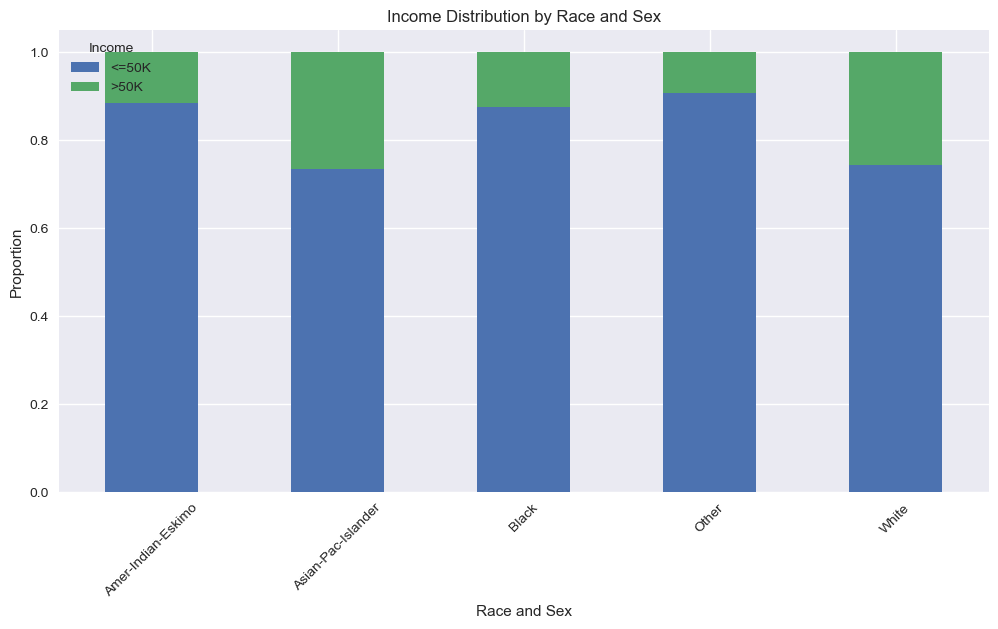

In [8]:
plt.figure(figsize=(10, 6))
df_adult.groupby(['race'])['income'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Income Distribution by Race and Sex")
plt.ylabel("Proportion")
plt.xlabel("Race and Sex")
plt.xticks(rotation=45)
plt.legend(title="Income", loc="upper left")
plt.show()

<Figure size 1000x600 with 0 Axes>

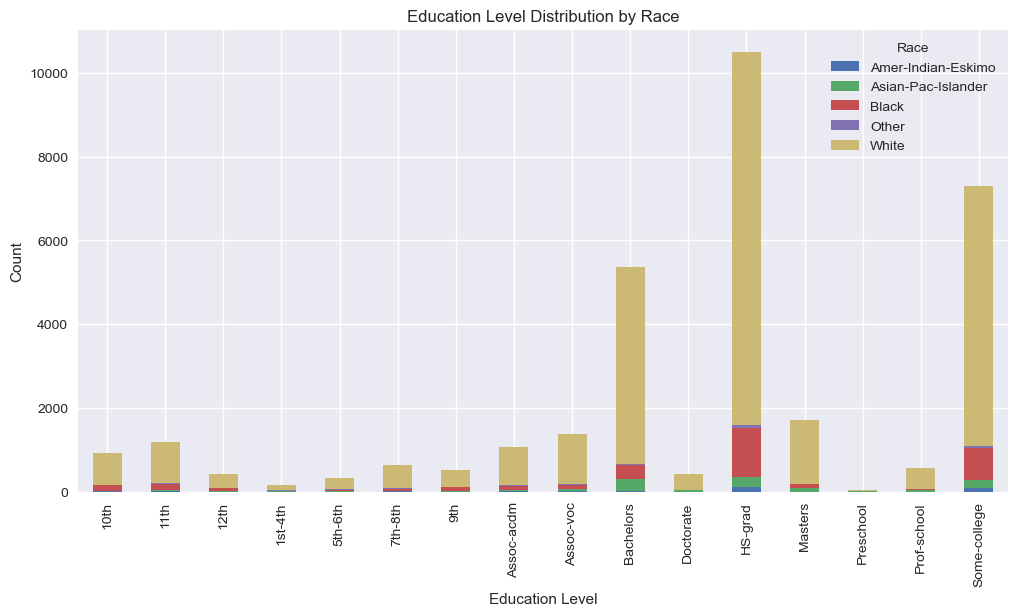

In [5]:
plt.figure(figsize=(10, 6))
df_adult.groupby(['education', 'race']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Education Level Distribution by Race")
plt.ylabel("Count")
plt.xlabel("Education Level")
plt.xticks(rotation=90)
plt.legend(title="Race", loc="upper right")
plt.show()

In [11]:
majority_group = 'White'
minority_groups = df_adult['race'].unique().tolist()
minority_groups.remove(majority_group)

income_by_race = df_adult.groupby('race')['income'].value_counts(normalize=True).unstack()
income_over_50k = income_by_race['>50K']

# Calculate Disparate Impact Ratio (DIR) for each minority group
dir_results = {race: income_over_50k[race] / income_over_50k[majority_group] for race in minority_groups}

dir_df = pd.DataFrame.from_dict(dir_results, orient='index', columns=['Disparate Impact Ratio'])

In [13]:
dir_df

,Disparate Impact Ratio
Black,0.484170
Asian-Pac-Islander,1.038224
Other,0.360552
Amer-Indian-Eskimo,0.452418
